# Russian License Plate Blurring on Images and Videos

Import the libraries needed for this project 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Read in the car_plate.jpg file from the DATA folder

In [2]:
plates= cv2.imread("../DATA/car_plate.jpg")

Creating a function that displays the image in a larger scale and correct coloring for matplotlib.

In [3]:
def display(img,cmap=None):
    img_colored=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img_colored,cmap=cmap)

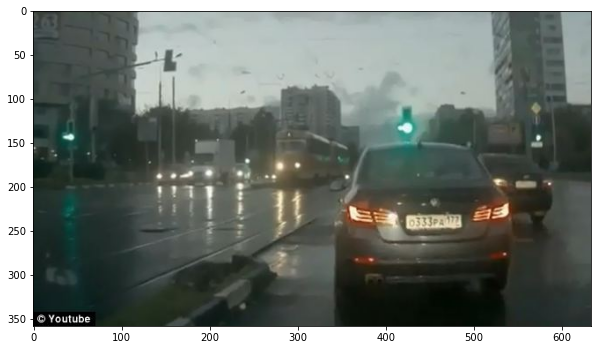

In [4]:
display(plates)

Load the haarcascade_russian_plate_number.xml classifier model file.

In [5]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

# Image Version

Create a function that takes in an image and just draws a rectangle around what it detects to be a license plate to see if the model works correctly.

In [6]:
def detect_plate(plates):
    
    plate_img = plates.copy()
    #detect plates
    detect_plate=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3)
    
    #Draw rectangles around the plates 
    for (x,y,w,h) in detect_plate:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (255,0,0), 2)
    
    return plate_img
    

In [7]:
result=detect_plate(plates)

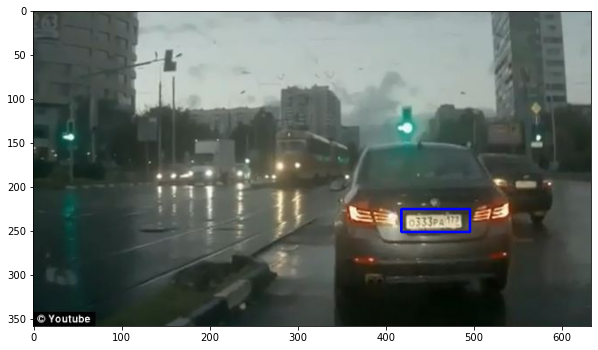

In [8]:
display(result)

We know that the classifier works as expected. I now edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. The steps Im going to take are:

1. Converting the (x,y,w,h) information into the dimension values you need to grab an ROI
2. Once I grabbed the ROI using the (x,y,w,h) values returned, I blur that ROI using cv2.medianBlur for this.
3. Paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [9]:
def detect_and_blur_plate(plates):
    plate_img = plates.copy()
    #detect plates
    detect_plate=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3)
    
    #Draw rectangles around the plates 
    for (x,y,w,h) in detect_plate:
        roi = plate_img[y:y+h,x:x+w]
        blurred_plate= cv2.medianBlur(roi,9)
        
        large_img = plate_img
        small_img = blurred_plate

        large_img[y:y+small_img.shape[0], x:x+small_img.shape[1]] = small_img
    
    return large_img
    # fill me in
    pass
    

In [10]:
result = detect_and_blur_plate(plates)

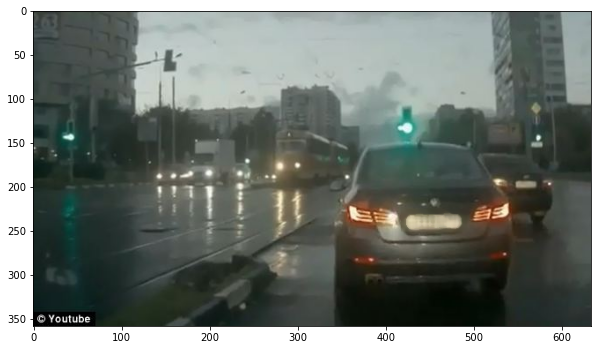

In [11]:
display(result)

# Video Version

We can take the same method and detect russian plates in videos, security videos, etc. I downloaded a video from youtube that show a busy russian street in Moscow that will be useful for this task.

In [111]:
#use the video inside de DATA folder 
cap=cv2.VideoCapture("../DATA/russian_plates.mp4")
# We need some variables to save the generated video, named out.mp4 
fourcc=cv2.VideoWriter_fourcc(*"XVID")
frame_width=int(cap.get(3))
frame_height=int(cap.get(4))
out=cv2.VideoWriter("out.mp4", fourcc,20,(frame_width,frame_height)) 

In [112]:
while True:
    
    ret,frame=cap.read()
    
    #convert to grayscale 
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #detect the faces 
    plates=plate_cascade.detectMultiScale(gray,scaleFactor=1.10, minNeighbors=5, maxSize=[200,200])
    
    #Draw a rectangle and blur the corresponding plates 
    for (x,y,w,h) in plates:
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        roi = frame[y:y+h,x:x+w]
        blurred_plate= cv2.medianBlur(roi,9)
        
        large_img = frame
        small_img = blurred_plate

        large_img[y:y+small_img.shape[0], x:x+small_img.shape[1]] = small_img
        out.write(frame)
    
    #record frame
    
    cv2.imshow("Recording Video", frame)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

#finishes the video recording and saves it 
out.release()

# Closes all the frames
cv2.destroyAllWindows()